## Analisis Univariado

In [1]:
# librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# cargar un cojunto de datos obteneidos desde un archivo .csv
co2 = pd.read_csv("data_set.csv")
# se necesita una copia de los datos ya que NUNACA SE DEBE TRABAJAR SOBRE LA MISMA MUESTRA ORIGINAL
df = co2.copy()

In [ ]:
#renombrar caracteristicas
df.rename(columns = {
    'Make' :'make',
    'Model' : 'model',
    'Vehicle Class' : 'vehicle class',
    'Engine Size(L)' : 'engine_size',
    'Cylinders' : 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type' : 'fuel type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city', # de aqui hacia abajo sacamos los datos
    'Fuel Consumption Hwy (L/100 km)' : 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)' : 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)' : 'fuel_cons_mpg',
    'CO2 Emissions(g/km)' : 'co2'

}, inplace=True)

(5908, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

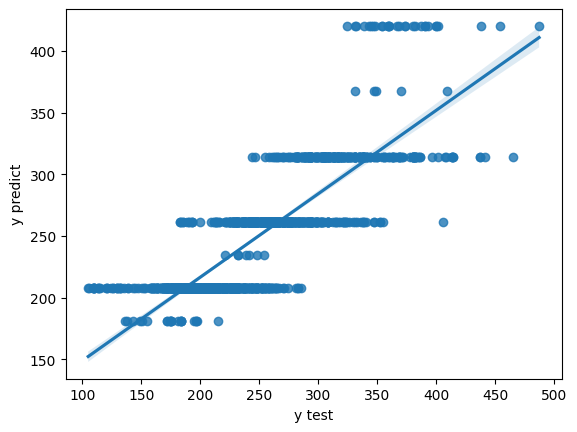

In [5]:
from sklearn.model_selection import train_test_split # funcion para la separacion correcta del data_set.csv
# separar caracteristiicas independientes seleccionada (cilindros) y la variable objetico es CO2

x = df[['cylinders']] 
y = df['co2'] # valores de co2

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) # dicicion del data_set, donde tengo dos subconjuntos de una variable
# la funcion anterior  evita que se le manden valores respuesta a la seccion de train, test_size es el tamanio de la muestra del tamanio, aun que tambien se puede especificar el tamanio de train
# el random estate es una semilla que hace simi aleatoria la muestra
print(x_train.shape) # funcion shape hace:


# regresion lineal
from sklearn.linear_model import LinearRegression
model_simple_lin_reg = LinearRegression()

# entrenar modelo
model_simple_lin_reg.fit(x_train, y_train)
#predecir usando el modelo
y_train_pred = model_simple_lin_reg.predict(x_train)
y_pred = model_simple_lin_reg.predict(x_test)



#grafica para rendimiento del entrenamiento 
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("y test")
plt.ylabel('y predict')
plt.show # valor real contra valor predicho, tenemos que tener en cuenta de que la linea tiene que tener un comportamiento donde pasa por todos los puntos


## Nota:
dado a que la regresion lineal es una operacion matematica para analisis estadisticos predictorios analisaremos aquellas variables que son cuantitativas, ya que por obvias razones no se puede usar variables de texto, por lo cual las siguientes columnas de data_set.CSV seran ignoradas: Make, Model, Vehicle Class, Transmission y Fuel Type.


- Analisis para engine_size

(5908, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

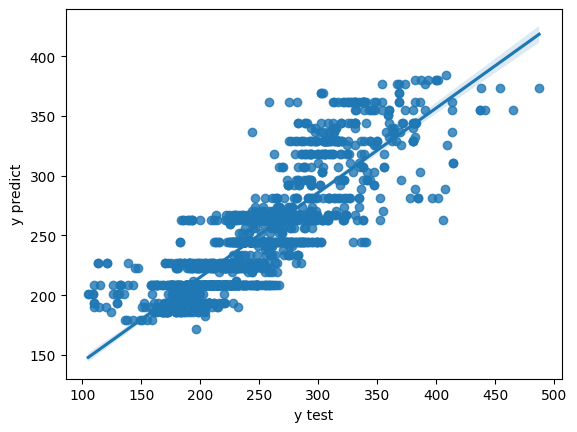

In [8]:
x = df[['engine_size']] # valor de make: valores independientes
y = df['co2'] # valores de co2: valor dependiente

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) # seccioando de data_set
print(x_train.shape) 

#Entrenamiento
model_simple_lin_reg.fit(x_train, y_train) # se le pasa los valores y los valores esperados para cada respuesta
#predecir usando el modelo
y_train_pred = model_simple_lin_reg.predict(x_train) # prediccion con datos de entrenamiento
y_pred = model_simple_lin_reg.predict(x_test) # predicion con datos nuevos de test

#grafica para rendimiento del entrenamiento 
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("y test")
plt.ylabel('y predict')
plt.show

In [9]:
from  sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

def validacion(y_train, y_train_pred, y_test, y_pred, value):
    scores = { value + "_train":{"R2": r2_score(y_train, y_train_pred), 
                                  "mae": mean_absolute_error(y_train, y_train_pred), 
                                  "mse": mean_squared_error(y_train, y_train_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_train, y_train_pred))},
                                  
                value + "_test":{"R2": r2_score(y_test, y_pred), 
                                  "mae": mean_absolute_error(y_test, y_pred), 
                                  "mse": mean_squared_error(y_test, y_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_test, y_pred))}}  
    return pd.DataFrame(scores)


# cuando los resultado en train y test son muy paracidos es que se esta generalizando
rl_scores = validacion(y_train, y_train_pred, y_test, y_pred, 'linear')
print(rl_scores)

      linear_train  linear_test
R2        0.724528     0.723812
mae      23.374987    22.927177
mse     941.716358   949.985253
rmse     30.687397    30.821831


- Analisis para

(5908, 1)
      linear_train  linear_test
R2        0.846560     0.841905
mae      14.230584    14.741110
mse     524.541371   543.789478
rmse     22.902868    23.319294


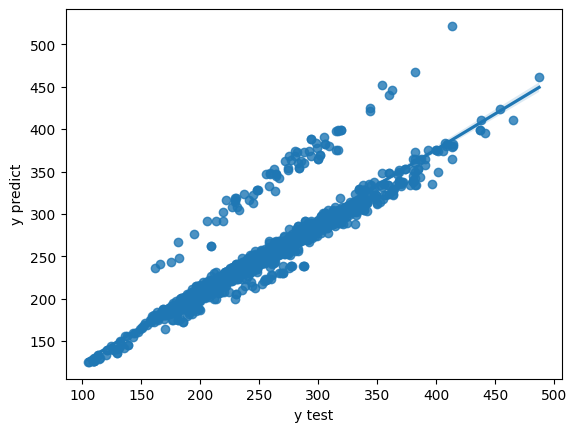

In [21]:
x = df[['fuel_cons_city']] # valor de make: valores independientes
y = df['co2'] # valores de co2: valor dependiente

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) # seccioando de data_set
print(x_train.shape) 

#Entrenamiento
model_simple_lin_reg.fit(x_train, y_train) # se le pasa los valores y los valores esperados para cada respuesta
#predecir usando el modelo
y_train_pred = model_simple_lin_reg.predict(x_train) # prediccion con datos de entrenamiento
y_pred = model_simple_lin_reg.predict(x_test) # predicion con datos nuevos de test

#grafica para rendimiento del entrenamiento 
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("y test")
plt.ylabel('y predict')
plt.show


from  sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

def validacion(y_train, y_train_pred, y_test, y_pred, value):
    scores = { value + "_train":{"R2": r2_score(y_train, y_train_pred), 
                                  "mae": mean_absolute_error(y_train, y_train_pred), 
                                  "mse": mean_squared_error(y_train, y_train_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_train, y_train_pred))},
                                  
                value + "_test":{"R2": r2_score(y_test, y_pred), 
                                  "mae": mean_absolute_error(y_test, y_pred), 
                                  "mse": mean_squared_error(y_test, y_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_test, y_pred))}}  
    return pd.DataFrame(scores)


# cuando los resultado en train y test son muy paracidos es que se esta generalizando
rl_scores = validacion(y_train, y_train_pred, y_test, y_pred, 'linear')
print(rl_scores)

- Analisis para fuel_cons_hwy

(5908, 1)
      linear_train  linear_test
R2        0.780101     0.782515
mae      18.351737    18.010741
mse     751.735837   748.067957
rmse     27.417801    27.350831


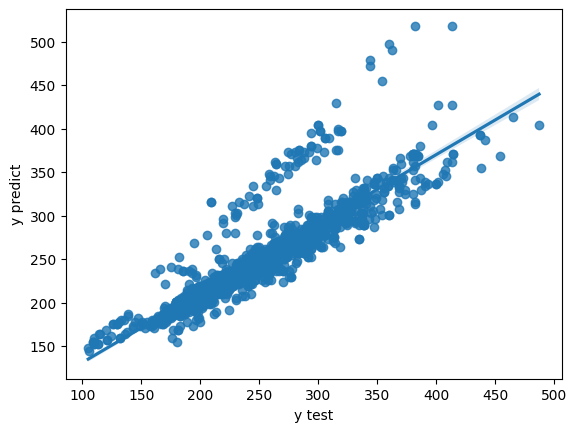

In [14]:
x = df[['fuel_cons_hwy']] # valor de make: valores independientes
y = df['co2'] # valores de co2: valor dependiente

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) # seccioando de data_set
print(x_train.shape) 

#Entrenamiento
model_simple_lin_reg.fit(x_train, y_train) # se le pasa los valores y los valores esperados para cada respuesta
#predecir usando el modelo
y_train_pred = model_simple_lin_reg.predict(x_train) # prediccion con datos de entrenamiento
y_pred = model_simple_lin_reg.predict(x_test) # predicion con datos nuevos de test

#grafica para rendimiento del entrenamiento 
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("y test")
plt.ylabel('y predict')
plt.show


from  sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

def validacion(y_train, y_train_pred, y_test, y_pred, value):
    scores = { value + "_train":{"R2": r2_score(y_train, y_train_pred), 
                                  "mae": mean_absolute_error(y_train, y_train_pred), 
                                  "mse": mean_squared_error(y_train, y_train_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_train, y_train_pred))},
                                  
                value + "_test":{"R2": r2_score(y_test, y_pred), 
                                  "mae": mean_absolute_error(y_test, y_pred), 
                                  "mse": mean_squared_error(y_test, y_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_test, y_pred))}}  
    return pd.DataFrame(scores)


# cuando los resultado en train y test son muy paracidos es que se esta generalizando
rl_scores = validacion(y_train, y_train_pred, y_test, y_pred, 'linear')
print(rl_scores)

- Analisis para fuel_cons_comb

(5908, 1)
      linear_train  linear_test
R2        0.843438     0.840220
mae      13.972944    14.218198
mse     535.214935   549.582948
rmse     23.134713    23.443186


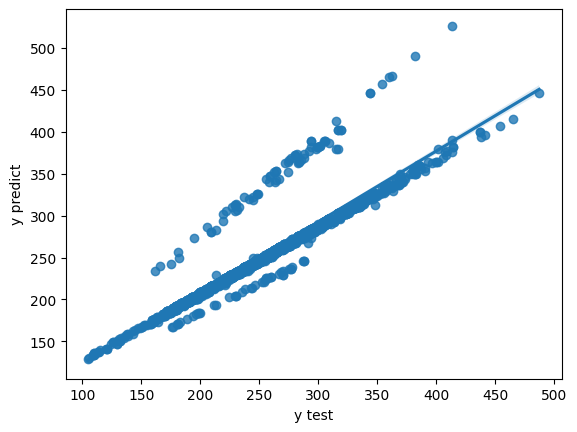

In [16]:
x = df[['fuel_cons_comb']] # valor de make: valores independientes
y = df['co2'] # valores de co2: valor dependiente

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) # seccioando de data_set
print(x_train.shape) 

#Entrenamiento
model_simple_lin_reg.fit(x_train, y_train) # se le pasa los valores y los valores esperados para cada respuesta
#predecir usando el modelo
y_train_pred = model_simple_lin_reg.predict(x_train) # prediccion con datos de entrenamiento
y_pred = model_simple_lin_reg.predict(x_test) # predicion con datos nuevos de test

#grafica para rendimiento del entrenamiento 
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("y test")
plt.ylabel('y predict')
plt.show


from  sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

def validacion(y_train, y_train_pred, y_test, y_pred, value):
    scores = { value + "_train":{"R2": r2_score(y_train, y_train_pred), 
                                  "mae": mean_absolute_error(y_train, y_train_pred), 
                                  "mse": mean_squared_error(y_train, y_train_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_train, y_train_pred))},
                                  
                value + "_test":{"R2": r2_score(y_test, y_pred), 
                                  "mae": mean_absolute_error(y_test, y_pred), 
                                  "mse": mean_squared_error(y_test, y_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_test, y_pred))}}  
    return pd.DataFrame(scores)


# cuando los resultado en train y test son muy paracidos es que se esta generalizando
rl_scores = validacion(y_train, y_train_pred, y_test, y_pred, 'linear')
print(rl_scores)

- Analisis para fuel_cons_mpg

(5908, 1)
      linear_train  linear_test
R2        0.824969     0.817011
mae      16.042752    16.668381
mse     598.351817   629.412730
rmse     24.461231    25.088099


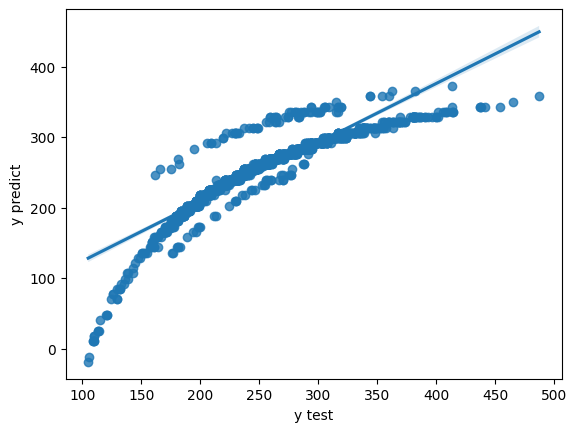

In [18]:
x = df[['fuel_cons_mpg']] # valor de make: valores independientes
y = df['co2'] # valores de co2: valor dependiente

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) # seccioando de data_set
print(x_train.shape) 

#Entrenamiento
model_simple_lin_reg.fit(x_train, y_train) # se le pasa los valores y los valores esperados para cada respuesta
#predecir usando el modelo
y_train_pred = model_simple_lin_reg.predict(x_train) # prediccion con datos de entrenamiento
y_pred = model_simple_lin_reg.predict(x_test) # predicion con datos nuevos de test

#grafica para rendimiento del entrenamiento 
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("y test")
plt.ylabel('y predict')
plt.show


from  sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

def validacion(y_train, y_train_pred, y_test, y_pred, value):
    scores = { value + "_train":{"R2": r2_score(y_train, y_train_pred), 
                                  "mae": mean_absolute_error(y_train, y_train_pred), 
                                  "mse": mean_squared_error(y_train, y_train_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_train, y_train_pred))},
                                  
                value + "_test":{"R2": r2_score(y_test, y_pred), 
                                  "mae": mean_absolute_error(y_test, y_pred), 
                                  "mse": mean_squared_error(y_test, y_pred),
                                  "rmse":np.sqrt(mean_squared_error(y_test, y_pred))}}  
    return pd.DataFrame(scores)


# cuando los resultado en train y test son muy paracidos es que se esta generalizando
rl_scores = validacion(y_train, y_train_pred, y_test, y_pred, 'linear')
print(rl_scores)

## Modelos de regresion multiple

In [19]:

x = df[['fuel_cons_comb','fuel_cons_city']] 
y = df['co2'] # variable independiente respuesta de X

def custom_color(val): # colocar un color coorecto segun el nivel de correlacion 
    if val > 0.90 and val <1:
      color = 'red'  # alta correlacion
    elif val >=1:
      color = 'blue' # 100%
    else:
      color = 'black' # nada que ver

pd.DataFrame(x).corr().style.map(custom_color) # correlacion de los datos con el estilo definido arriba

model_multi_lr = LinearRegression() # objeto de regrecion lineal multiple

model_multi_lr.fit(x_train, y_train) # entrenamiento

y_pred= model_multi_lr.predict(x_test) # prediccion con datos de prueba que no ha visto
y_train_pred = model_multi_lr.predict(x_train) # prediccion con los mismos datos de entrenamiento

# validacion a ciegas
mlr_scores= validacion(y_train, y_train_pred, y_test, y_pred, 'linear')
print(mlr_scores)

      linear_train  linear_test
R2        0.824969     0.817011
mae      16.042752    16.668381
mse     598.351817   629.412730
rmse     24.461231    25.088099


In [22]:
x = df[['fuel_cons_hwy','fuel_cons_mpg']] 
y = df['co2'] # variable independiente respuesta de X

def custom_color(val): # colocar un color coorecto segun el nivel de correlacion 
    if val > 0.90 and val <1:
      color = 'red'  # alta correlacion
    elif val >=1:
      color = 'blue' # 100%
    else:
      color = 'black' # nada que ver

pd.DataFrame(x).corr().style.map(custom_color) # correlacion de los datos con el estilo definido arriba

model_multi_lr = LinearRegression() # objeto de regrecion lineal multiple

model_multi_lr.fit(x_train, y_train) # entrenamiento

y_pred= model_multi_lr.predict(x_test) # prediccion con datos de prueba que no ha visto
y_train_pred = model_multi_lr.predict(x_train) # prediccion con los mismos datos de entrenamiento

# validacion a ciegas
mlr_scores= validacion(y_train, y_train_pred, y_test, y_pred, 'linear')
print(mlr_scores)

      linear_train  linear_test
R2        0.846560     0.841905
mae      14.230584    14.741110
mse     524.541371   543.789478
rmse     22.902868    23.319294
